# Implementation from Scratch

<br />

I am going to implement algorithms by using the least kinds of libraries such as Numpy possible.

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

## [Task 1] Create a Class of K-means

<br />

I am going to create a class of K-means that is a nonhierarchical clustering method.

#### Artificial Dataset for Clustering

<br />

I prepare an artificial dataset for the validation of the clustering.

The make_blobs function outputs correct labels, but I do not use them on this task.

In [2]:
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
X

array([[ 0.72086751,  3.71347124],
       [-1.89468423,  7.96898545],
       [ 1.35678894,  4.36462484],
       [ 1.05374379,  4.49286859],
       [ 1.59141542,  4.90497725],
       [ 0.78260667,  4.15263595],
       [-1.95751686,  3.87291474],
       [-0.77354537,  7.87923564],
       [ 0.12313498,  5.27917503],
       [-1.43284669,  7.71577043],
       [-0.92819001,  7.02698199],
       [-1.74836345,  7.06307447],
       [-1.26789718,  7.25141327],
       [-0.98661744,  7.74968685],
       [-0.81984047,  7.50994722],
       [ 2.99684287,  0.22378413],
       [ 1.46870582,  1.86947425],
       [-0.33533163,  3.390122  ],
       [-1.86407034,  2.93379754],
       [ 2.62496786,  0.28025075],
       [ 2.11114739,  3.57660449],
       [-1.8219901 ,  7.61654999],
       [-1.91186205,  3.18750686],
       [ 2.28809874,  0.12954182],
       [ 0.5285368 ,  4.49723858],
       [-1.57613028,  2.58614312],
       [-0.565433  ,  3.65813966],
       [ 0.802314  ,  4.38196181],
       [ 2.79939362,

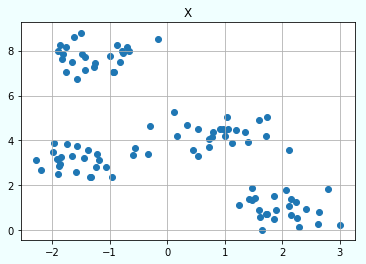

In [4]:
# Plot the dataset

plt.figure(facecolor="azure", edgecolor="coral")
plt.title("X")
plt.grid()

plt.scatter(X[:,0],X[:,1])

plt.show()

#### Objective Function

<br />

K-means fit datasets by computing $r_{nk}$ and $\mu$ minimizing SSE, sum of squared errors.

I use this to take the number of clusters, $K$ on the elbow method.

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$: index of a data point

$k$: index of a cluster

$X_n$: $n$th data point

$\mu_k$: $k$th central point

$r_{nk}$: 1 if the data point $X_n$ is in the cluster $k$, 0 if not.

#### Fitting

<br />

Basics of fitting by K-means are repeating the following 2 steps.

#### Euclidean distance

<br />

In terms of K-means, *near* means a value of the Euclidean distance between 2 points is small.

It can be computed by the following equation when I let $p, q$ vectors.

$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

#### Initial values

<br />

In this task, I will take the most simplest way that I choose k points as initial values randomly from data points $X_n$.

#### Prediction

<br />

When I predict what cluster each new data point belong to, I do the same work with the first phase of fitting.

- On data points $X_n$, I will take centroids $\mu_k$ by fitting and choose $r_{nk}$ minimalizing the SSE.

<br />

To be concrete,

- I will assign each data point to the most nearest $\mu_k$.

In [5]:
# Create a class of K-means from scratch

class ScratchKMeans():
    """
    Implement K-means from scratch.
    
    Parameters
    ----------
    k: int
        The number of labels
    
    num_iter: int
        The number of iteration
    
    Attributes
    ----------
    centroids: ndarray whose shape is (n_features,n_iters)
        K centroids already fitted
    """
    
    def __init__(self, k, num_iter):
        # Record hyperparameters as attribute
        self.k = k
        self.iter = num_iter
    
    
    def fit(self, X):
        """
        Fit datasets by K-means.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        
        # Set initial central points
        np.random.seed(32)
        index = np.array(range(X.shape[1]))
        np.random.shuffle(index)
        k_index = index[:self.k]
        self.centroids = X[:,k_index]
        
        # Update the centroids untill they are changing
        for i in range(self.iter):
            cluster_table = self.assign_cluster(X, self.centroids)
            temporary_centroids = self.update_centroids(X, cluster_table)
            if np.allclose(self.centroids, temporary_centroids):
                break
            else:
                self.centroids = temporary_centroids
#                 print("iter:",i)
        
        # Compute the SSE
        return np.sum(np.square(cluster_table))
    
    
    # Compute distances between each point and central points and assign them to theirown label
    def assign_cluster(self, X, centroids):
        """
        Assign each data point to the most nearest cluster.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        centroids: ndarray whose shape is (n_features,n_iters)
            Initial k centroids
        
        Returns
        ----------
        cluster_table: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        """
        
        cluster_table = np.zeros((X.shape[1], self.k))
        for i in range(X.shape[1]):
            min_d = 1e+10000
            label = 0
            for j in range(self.k):
                d = np.linalg.norm(X[:,i]-centroids[:,j])
                if d < min_d:
                    min_d = d
                    label = j
            cluster_table[i,label] = min_d
        
        return cluster_table
    
    
    # Update centroids
    def update_centroids(self, X, cluster_table):
        """
        Assign each data point to the most nearest cluster.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        cluster_table: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        
        Returns
        ----------
        centroids: ndarray whose shape is (n_features,n_iters)
            Updated k centroids
        """
        
        centroids = np.zeros((2, self.k))
        for i in range(self.k):
            index = np.where(cluster_table[:,i]!=0)
            centroids[0,i] = sum(X[0,index[0]])/len(index[0])
            centroids[1,i] = sum(X[1,index[0]])/len(index[0])
        
        return centroids
    
    
    def predict(self, X):
        """
        Predict datasets by K-means.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        Returns
        ----------
        y_pred: ndarray whose shape is (n_samples,n_clusters)
            A table showing what cluster each data point belong to and distances between each data point and the most nearest cluster
        """
        
        # Transform arrays to move their features to rows
        X = X.T
        
        # Return a cluster table
        return self.assign_cluster(X, self.centroids)
    
    
    # Implement the Elbow method
    def elbow_method(self, X, kinds_of_clusters):
        """
        Implement the Elbow method.
        
        Parameters
        ----------
        X: ndarray whose shape is (n_samples,n_features)
            Features of train dataset
        
        kinds_of_clusters: int
            The number of kinds of clusters
        """
        
        k_list = []
        sse_list = []
        for i in range(kinds_of_clusters+1):
            kmeans = ScratchKMeans(i+1,100)
            sse = kmeans.fit(X)
            k_list.append(i+1)
            sse_list.append(sse)
        
        plt.figure(facecolor="azure", edgecolor="coral")
        plt.grid(True)
        
        plt.plot(k_list, sse_list)
        
        plt.title("Elbow Method")
        plt.xlabel("Number of Clusters")
        plt.ylabel("SSE")
        
        plt.show()

In [6]:
# Initialize the class

kmeans = ScratchKMeans(13,100)

In [7]:
# Fitting

kmeans.fit(X)

22.208689719369755

## [Task 2] Implement Elbow method

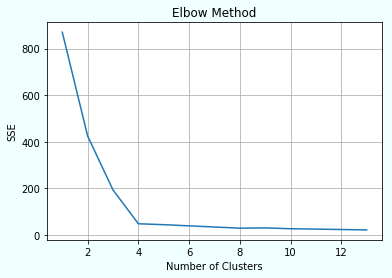

In [8]:
# Plot a graph of the Elbow method

kmeans.elbow_method(X, 12)

## [Task 3] Silhouette Plot

# Clustering Analysis

#### Data Analysis for Wholesalers

<br />

I am going to use the "Wholesale customers Data Set" file to learn about how to use clustering.

The dataset is that a wholesaler in Lisbon, Portugal collected data from its customers.

It shows how much Euros each customer buy any products such as milk and food per year.

Customers include retail stores and restaurants.

In [9]:
# Import the csv file

df = pd.read_csv("wholesale-customers-data.csv")

In [10]:
# Check the contents

df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#### Dimention Reduction

<br />

There are 6 features about costs, so I will reduce the dimentions to visualize the data.

In [14]:
# Delete 2 features, Channel and Region

new_df = df.drop(["Channel","Region"], axis=1)

In [15]:
# PCA

pca = PCA(n_components=2)
pca = pca.fit(new_df)
new_df_pca = pca.transform(new_df)

In [16]:
# Check the PCA

new_df_pca

array([[ 6.50022122e+02,  1.58551909e+03],
       [-4.42680498e+03,  4.04245151e+03],
       [-4.84199871e+03,  2.57876218e+03],
       [ 9.90346437e+02, -6.27980600e+03],
       [ 1.06579987e+04, -2.15972582e+03],
       [-2.76596159e+03, -9.59870727e+02],
       [-7.15550892e+02, -2.01300227e+03],
       [-4.47458367e+03,  1.42949697e+03],
       [-6.71209540e+03, -2.20590916e+03],
       [-4.82363435e+03,  1.34805592e+04],
       [-7.97482898e+03,  5.71121893e+03],
       [ 3.63937790e+01, -6.03789641e+03],
       [ 1.99402021e+04,  4.59128648e+03],
       [ 9.39669558e+03,  5.91315704e+03],
       [ 1.26603704e+04,  4.54194543e+03],
       [-2.99772590e+03, -6.09387930e+03],
       [-1.05895236e+04,  6.58421594e+03],
       [-6.36709518e+03, -3.68071267e+03],
       [ 6.62382534e+03,  1.25471953e+03],
       [-4.86153157e+03, -2.25592266e+02],
       [ 4.79424416e+03, -3.98879936e+03],
       [-7.24486684e+03, -7.34772325e+03],
       [ 1.92992657e+04, -6.93681068e+03],
       [ 1.

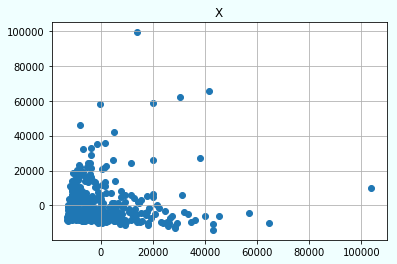

In [17]:
# Plot the PCA data

plt.figure(facecolor="azure", edgecolor="coral")
plt.title("X")
plt.grid()

plt.scatter(new_df_pca[:,0],new_df_pca[:,1])

plt.show()

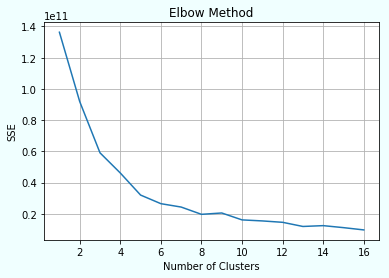

In [18]:
# Plot a graph of the Elbow method

kmeans.elbow_method(new_df_pca, 15)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


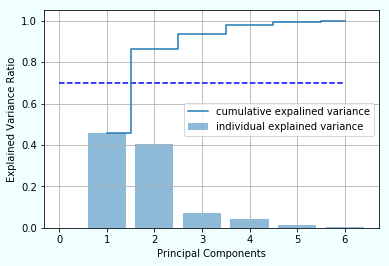

In [19]:
# Draw a graph of explained variance ratios of PCA

pca = PCA(n_components=None)
pca = pca.fit(new_df)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

plt.figure(facecolor="azure", edgecolor="coral")
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')

plt.hlines(0.7, 0, 6, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()

plt.show()

## [Task 4] Choose the Number of Clusters

    - I let $k$ 5.

    - The reason why I let $k$ 5 is nothing special. It is just chosen by the reason that the polygonal line is bending relatively bigger than others.

## [Task 5] Compare the PCAed Data about Costs with the Other Known Data

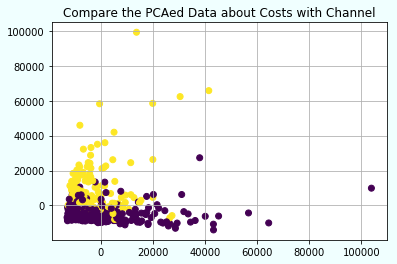

In [20]:
# Plot the PCAed data about costs by comparing with the "Channel" data

plt.figure(facecolor="azure", edgecolor="coral")
plt.title("Compare the PCAed Data about Costs with Channel")
plt.grid()

plt.scatter(new_df_pca[:,0], new_df_pca[:,1], c=df.Channel)

plt.show()

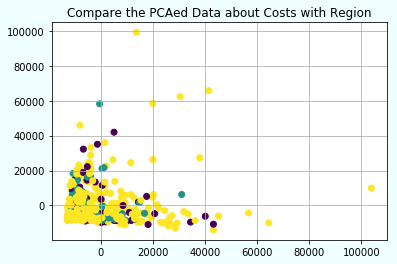

In [21]:
# Plot the PCAed data about costs by comparing with the "Region" data

plt.figure(facecolor="azure", edgecolor="coral")
plt.title("Compare the PCAed Data about Costs with Region")
plt.grid()

plt.scatter(new_df_pca[:,0], new_df_pca[:,1], c=df.Region)

plt.show()

    - The data of "Channel" and "Region" are categorical while the other 6 datas are quantitative.

## [Task 6] Meaningful Information for Wholesalers

# Other Kinds of Non-hierarchical Clustering Methods

## [Task 7] Other Kinds of Methods

- DBSCAN as Non-hierarchical clustering method

    - 

- t-SNE and LLE as dimention reduction method

    - 

## [Task 8] Use of t-SNE and DBSCAN

# Discussion

## [Task 9] Unsupervised Learning and Supervised Learning

    - The main difference between unsupervied learning and supervised learning is that unsupervised leaning does not have specific labels while supervised learning has.
    
    - Supervised learning requires both of explanatory and objective variances while unsupervised learning does not.
    
    - Supervised learning is affected by too much similar data, but unsupervised learning can be applied to unbalanced data.
    
    - We need to analyze results of unsupervised learning carefully because it does not have any specific labels.